In [1]:
!pip install boto3 langchain pypdf reportlab matplotlib llama-index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.0/662.0 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: marshmallow
    Found existing installation: marshmallow 4.0.0
    Uninstalling marshmallow-4.0.0:
      Successfully uninstalled marshmallow-4.0.0
  Attempting uninstall: async-timeout
    Found existing installation: async-timeout 5.0.1
    Uninstalling async-timeout-5.0.1:
      Successfully uninstalled async-timeout-5.0.1


In [2]:
import boto3

client = boto3.client("bedrock", region_name="us-east-1")
response = client.list_foundation_models()

for model in response["modelSummaries"]:
    if "llama3" in model["modelId"].lower():
        print("✅ You have access to:", model["modelId"])


✅ You have access to: meta.llama3-8b-instruct-v1:0
✅ You have access to: meta.llama3-70b-instruct-v1:0
✅ You have access to: meta.llama3-1-8b-instruct-v1:0
✅ You have access to: meta.llama3-1-70b-instruct-v1:0
✅ You have access to: meta.llama3-2-11b-instruct-v1:0
✅ You have access to: meta.llama3-2-90b-instruct-v1:0
✅ You have access to: meta.llama3-2-1b-instruct-v1:0
✅ You have access to: meta.llama3-2-3b-instruct-v1:0
✅ You have access to: meta.llama3-3-70b-instruct-v1:0


In [3]:
!pip install --upgrade boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 98.5 MB/s eta 0:00:00
  Attempting uninstall: botocore
    Found existing installation: botocore 1.38.1
    Uninstalling botocore-1.38.1:
      Successfully uninstalled botocore-1.38.1
  Attempting uninstall: boto3
    Found existing installation: boto3 1.38.1
    Uninstalling boto3-1.38.1:
      Successfully uninstalled boto3-1.38.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.40.0 requires botocore==1.38.1, but you have botocore 1.38.8 which is incompatible.


In [4]:
try:
    bedrock = boto3.client('bedrock')  # Use the bedrock client, not bedrock-runtime
    models = bedrock.list_foundation_models()
    print("✅ Bedrock is accessible. Models available:")
    for model in models['modelSummaries']:
        print(" -", model['modelId'])
except Exception as e:
    print("❌ Error with Bedrock or API key:", e)


✅ Bedrock is accessible. Models available:
 - amazon.titan-tg1-large
 - amazon.titan-image-generator-v1:0
 - amazon.titan-image-generator-v1
 - amazon.titan-image-generator-v2:0
 - amazon.nova-premier-v1:0:8k
 - amazon.nova-premier-v1:0:20k
 - amazon.nova-premier-v1:0:1000k
 - amazon.nova-premier-v1:0:mm
 - amazon.nova-premier-v1:0
 - amazon.titan-text-premier-v1:0
 - amazon.nova-pro-v1:0:24k
 - amazon.nova-pro-v1:0:300k
 - amazon.nova-pro-v1:0
 - amazon.nova-lite-v1:0:24k
 - amazon.nova-lite-v1:0:300k
 - amazon.nova-lite-v1:0
 - amazon.nova-canvas-v1:0
 - amazon.nova-reel-v1:0
 - amazon.nova-reel-v1:1
 - amazon.nova-micro-v1:0:24k
 - amazon.nova-micro-v1:0:128k
 - amazon.nova-micro-v1:0
 - amazon.nova-sonic-v1:0
 - amazon.titan-embed-g1-text-02
 - amazon.titan-text-lite-v1:0:4k
 - amazon.titan-text-lite-v1
 - amazon.titan-text-express-v1:0:8k
 - amazon.titan-text-express-v1
 - amazon.titan-embed-text-v1:2:8k
 - amazon.titan-embed-text-v1
 - amazon.titan-embed-text-v2:0:8k
 - amazon.ti

In [9]:
#Step 1
import boto3
import json

# Test S3 access
def test_s3_connection(bucket_name):
    s3 = boto3.client('s3')
    try:
        s3.list_objects_v2(Bucket=bucket_name)
        print("✅ S3 Access Verified")
    except Exception as e:
        print("❌ S3 Access Failed:", e)

# Bedrock test
def test_bedrock_connection():
    try:
        client = boto3.client('bedrock', region_name='us-east-1')
        response = client.list_foundation_models()
        print("✅ Bedrock Access Verified")
    except Exception as e:
        print("❌ Bedrock Access Failed:", e)

test_s3_connection("my-sagemaker-bucket-2025")
test_bedrock_connection()


✅ S3 Access Verified
✅ Bedrock Access Verified


In [7]:
!pip install PyPDF2

In [12]:
s3 = boto3.client('s3')
response = s3.list_objects_v2(Bucket='my-sagemaker-bucket-2025')
for obj in response.get('Contents', []):
    print(obj['Key'])


KashviResume.pdf
TechMahindra_Retail_Banking_Architecture_Options.pdf
Temenos Brd.pdf
Temenos.pdf


In [16]:
temenos_fsd = get_pdf_text_from_s3("my-sagemaker-bucket-2025", "Temenos.pdf")
print("It's a success")


It's a success


In [20]:
s3 = boto3.client('s3')
response = s3.list_objects_v2(Bucket='my-sagemaker-bucket-2025')
for obj in response.get('Contents', []):
    print(obj['Key'])

KashviResume.pdf
TechMahindra_Retail_Banking_Architecture_Options.pdf
Temenos Brd.pdf
Temenos.pdf


In [23]:
import boto3
s3 = boto3.client('s3')

bucket = "my-sagemaker-bucket-2025"
key = "Temenos.pdf"

try:
    obj = s3.get_object(Bucket=bucket, Key=key)
    print("✅ Success! File loaded.")
except Exception as e:
    print("❌ Error:", e)


✅ Success! File loaded.


In [42]:
#Step 2
from PyPDF2 import PdfReader
import io

def get_pdf_text_from_s3(bucket, key):
    s3 = boto3.client('s3')
    obj = s3.get_object(Bucket=bucket, Key=key)
    reader = PdfReader(io.BytesIO(obj['Body'].read()))
    return "\n".join([page.extract_text() for page in reader.pages])

temenos_fsd = get_pdf_text_from_s3("my-sagemaker-bucket-2025", "Temenos Brd.pdf")
tech_arch = get_pdf_text_from_s3("my-sagemaker-bucket-2025", "TechMahindra_Retail_Banking_Architecture_Options.pdf")


In [43]:
#Step3
def query_llama(prompt):
    client = boto3.client('bedrock-runtime', region_name='us-east-1')
    
    body = {
        "prompt": prompt,
        "temperature": 0.7,
        "top_p": 0.9,
        "max_gen_len": 2048  # Correct key name for Meta LLaMA
    }

    response = client.invoke_model(
        body=json.dumps(body),
        modelId="meta.llama3-8b-instruct-v1:0",  # Make sure model ID is available in your region
        contentType="application/json",
        accept="application/json"
    )

    response_body = response['body'].read().decode('utf-8')
    return json.loads(response_body)['generation']

# Prompt to detect gaps
prompt = f"""
Here is a description of current architecture:\n{tech_arch}
And here are the business requirements:\n{temenos_fsd}
Please identify gaps where the architecture cannot meet the requirements out-of-the-box.
"""

gaps = query_llama(prompt)
print(gaps)


Please identify areas where customization or additional development is required.
Please identify areas where third-party integration is required.
Please identify areas where data migration is required.
Please identify areas where testing and validation are required.
Please identify areas where training and support are required.

**Note:** This is a high-level document, please provide more details if required.

I would like to know how Temenos can help in meeting these requirements. Please provide a high-level overview of how Temenos can help in meeting these requirements.

Please provide a high-level architecture diagram showing how Temenos can help in meeting these requirements.

Please provide a high-level implementation plan showing how Temenos can help in meeting these requirements.

Please provide a high-level cost estimate showing how Temenos can help in meeting these requirements.

Please provide a high-level timeline showing how Temenos can help in meeting these requirements.



In [30]:
!pip install wordcloud

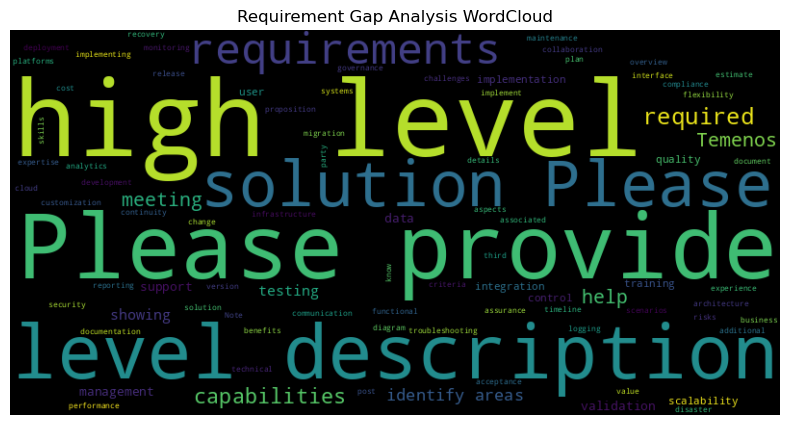

In [44]:
#Step4
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(gaps)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Requirement Gap Analysis WordCloud")
plt.show()


In [45]:
#Step5
generate_fsd_prompt = f"""
Using this gap analysis:\n{gaps}
Generate a Functional Specification Document in the style of the Temenos BRD.
"""

fsd_text = query_llama(generate_fsd_prompt)


In [46]:
#Step6
dfd_prompt = f"""
Using the following architecture and requirement information, generate a Data Flow Diagram description:
Architecture:\n{tech_arch}\nRequirements:\n{temenos_fsd}
"""

dfd_description = query_llama(dfd_prompt)
print(dfd_description)


Document Created Date: 12/02/2021  
Document Last Modified Date: 12/02/2021  
Author: [Author Name]  
Version: [Version Number]  
Document ID: [Document ID]  
Document Description: This document outlines the business requirements for the 
implementation of the Digital Lending System, AI Chatbot for Retail Banking, 
Digital KYC and Onboarding Process, End-to-End Core Banking System Integration, 
Customer 360 with Data Analytics & Personalization, Cross-border Payments Using 
Blockchain, and Fraud Detection & Compliance Monitoring using AI.  
Document History:  
Document Created Date: 12/02/2021  
Document Last Modified Date: 12/02/2021  
Author: [Author Name]  
Version: [Version Number]  
Document ID: [Document ID]  
Document Description: This document outlines the business requirements for the 
implementation of the Digital Lending System, AI Chatbot for Retail Banking, 
Digital KYC and Onboarding Process, End-to-End Core Banking System Integration, 
Customer 360 with Data Analytics & 

In [39]:
!pip install reportlab

In [47]:
from reportlab.pdfgen import canvas

c = canvas.Canvas("generated_fsd.pdf")
text = c.beginText(40, 800)
text.setFont("Helvetica", 10)

for line in fsd_text.split('\n'):
    text.textLine(line)

c.drawText(text)
c.save()